# 국민청원 데이터로 청원 카테고리 분류하기

* 청원의 카테고리를 분류해 봅니다.

In [1]:
import pandas as pd
import numpy as np
import re
print(pd.__version__)
print(np.__version__)

0.23.1
1.14.5


# 데이터 로드하기

In [2]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어옵니다.
petitions = pd.read_csv('petition.csv', parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 봅니다.
petitions.shape

(224538, 8)

In [3]:
petitions.describe()

,article_id,answered,votes
count,224538.000000,224538.000000,224538.000000
mean,136099.022495,0.000120,149.713670
std,85343.975691,0.010965,4621.392868
min,21.000000,0.000000,0.000000
25%,58567.250000,0.000000,1.000000
50%,134727.500000,0.000000,3.000000
75%,208610.750000,0.000000,11.000000
max,290647.000000,1.000000,714875.000000


In [4]:
# 전체 데이터 중 투표가 1000건 이상인 데이터를 기준으로 가져옵니다. 아웃라이어 데이터 제거를 위해 10만건 이상 데이터도 제거합니다.
df = petitions.loc[(petitions['votes'] > 10) & (petitions['votes'] < 100000)].copy()
df.shape

(56911, 8)

In [5]:
### 수정 ####
# 중복된 청원 데이터는 좋지 않다고 판단, 도배된 청원 데이터들을 제거합니다.
df = df.drop_duplicates(['title', 'content'], keep='last')
df.shape

(56561, 8)

In [6]:
df.describe()

,article_id,answered,votes
count,56561.000000,56561.0,56561.000000
mean,171665.497746,0.0,313.582415
std,73252.162746,0.0,2654.365612
min,22.000000,0.0,11.000000
25%,120734.000000,0.0,16.000000
50%,178923.000000,0.0,27.000000
75%,227825.000000,0.0,65.000000
max,290647.000000,0.0,99947.000000


In [7]:
category_count = df['category'].value_counts()
category_count

정치개혁           11507
인권/성평등          6447
기타              5913
안전/환경           4398
문화/예술/체육/언론     4009
외교/통일/국방        3967
육아/교육           3533
보건복지            3037
경제민주화           2623
행정              2479
교통/건축/국토        2330
일자리             2035
미래              1848
반려동물            1258
성장동력             657
저출산/고령화대책        377
농산어촌             143
Name: category, dtype: int64

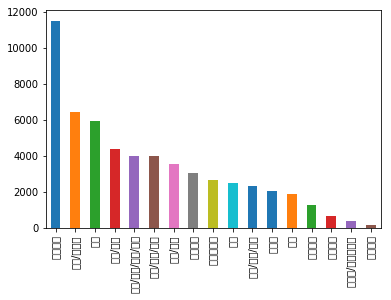

In [8]:
%matplotlib inline 
category_count.plot(kind='bar')

In [9]:
# 예측값과 실제값 비교를 위해 컬럼을 하나 더 생성합니다.
df['category_pred'] = df['category'].copy()

In [10]:
df.head()

,article_id,start,end,answered,votes,category,title,content,category_pred
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,기타
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,일자리
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,경제민주화
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이...",경제민주화
12,33,2017-08-19,2017-11-17,0,15,인권/성평등,납득할 수 있는 장애 재판정을 받고 싶습니다.,안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...,인권/성평등


In [11]:
# 첫 번째 인덱스를 가져와 봅니다.
sample_index = df.iloc[0][0]
sample_index

22

In [12]:
# sample_title = df['title'][sample_index]
# sample_title

In [13]:
# sample_content = petitions['content'][sample_index]
# sample_content

# 전처리 하기 

In [14]:
def preprocessing(text):
    # 개행문자 제거
    text= str(text)
#     text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    
    def preprocessing(text):
    # 개행문자 제거
#     text = re.sub('\\\\\n', ' ', text)  # 띄어쓰기를 제거한다.
#     text = re.sub('and', ' ', text)
#     text = re.sub('합니다', ' ', text)  
        text = re.sub('대통령님', ' ', text)
        text = re.sub('입니다', ' ', text)
#     text = re.sub('것', ' ', text)
#     text = re.sub('합니다', ' ', text)
    
        return text
    
    
    return text

In [17]:
# 샘플데이터에 적용
# pre_sample_content = preprocessing(sample_content)

In [18]:
# pre_sample_content

In [19]:
%time df['content_preprocessing'] = df['content'].apply(preprocessing)

CPU times: user 4.8 s, sys: 59.4 ms, total: 4.86 s
Wall time: 4.88 s


In [20]:
! pip install soynlp

from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer
from soynlp.noun import LRNounExtractor

enizer = RegexTokenizer()
enizer

distributed 1.22.0 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [28]:
noun_extractor = LRNounExtractor(min_count = 1)
df['content_preprocessing2'] = df['content_preprocessing'].apply(noun_extractor.train)
%time df['content_preprocessing2'] = df['content_preprocessing2'].apply(noun_extractor.extract())

TypeError: __init__() got an unexpected keyword argument 'min_count'

In [170]:
# df['content_preprocessing3'].head()

# 학습세트와 테스트세트 만들기
* 학습세트와 테스트세트를 7:3의 비율로 나눠 줍니다.

In [171]:
df = df.reindex()

In [172]:
df.shape

(56561, 11)

In [173]:
split_count = int(df.shape[0] * 0.7)
split_count

39592

In [174]:
df_train = df.sample(frac=0.7,random_state=200)
df_train.shape

(39593, 11)

In [175]:
df_train.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2
103941,124648,2018-02-01,2018-03-03,0,17,인권/성평등,정신 못차리는 박상기 법무부 장관을 해임해 주세요 - 국민들의 행복을 위해,박상기 법무부 장관\n정말 정신 못차리는 사람이네요\n지난번에는 가상화폐 거래소 폐...,인권/성평등,박상기 법무부 장관 n정말 정신 못차리는 사람이네요 n지난번에는 가상화폐 거래소 폐...,박상기 법무부 장관 n정말 정신 못차리는 사람이네요 n지난번에는 가상화폐 거래소 폐...
52597,54608,2017-11-29,2017-12-29,0,49,저출산/고령화대책,시험관아기시술 건강보험적용!!! 생애 첫 아이만이라도 시술회수제한 및 나이제한...,존경하는 문재인 대통령님! 각부처에서 고생하시는 여러 의원님! 간곡히 고개...,저출산/고령화대책,존경하는 문재인 대통령님 각부처에서 고생하시는 여러 의원님 간곡히 고개숙여...,존경하는 문재인 대통령님 각부처에서 고생하시는 여러 의원님 간곡히 고개숙여...
118000,141415,2018-02-18,2018-03-20,0,12,안전/환경,올림픽이 우선인가요 국민이 우선인가요?,대한민국이 뽑은 대통령이시라면 대한민국의 왕이라면 대한민국 내에 있는 국민의 안전...,안전/환경,대한민국이 뽑은 대통령이시라면 대한민국의 왕이라면 대한민국 내에 있는 국민의 안전...,대한민국이 뽑은 대통령이시라면 대한민국의 왕이라면 대한민국 내에 국민의 안전과 국...
169564,210159,2018-04-23,2018-05-23,0,74,보건복지,차병원 관련 사안의견 및 의료계 혁신 동의부탁.,"의료계의 혁신이 되지 않는다면, 최근 불행이 계속 되어질 수 있다는 생각에 이 글을...",보건복지,의료계의 혁신이 되지 않는다면 최근 불행이 계속 되어질 수 있다는 생각에 이 글을 ...,의료계의 혁신이 되지 않는다면 최근 불행이 계속 되어질 있다는 생각에 이 글을 올립...
53256,55321,2017-11-30,2017-12-30,0,30,육아/교육,"초등학교 1,2학년의 영어과후수업 일몰에 대하여","오늘자 뉴스에 2018년 2월 28일부로 초등학교 1,2학년 영어방과후수업을 종료한...",육아/교육,오늘자 뉴스에 년 월 일부로 초등학교 학년 영어방과후수업을 종료한다라고 보도되고있다...,오늘자 뉴스에 년 일부로 초등학교 학년 영어방과후수업을 종료한다라고 보도되고있다이는...


In [176]:
df_test = df.drop(df_train.index)
df_test.shape

(16968, 11)

In [177]:
df_test.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,경제민주화,존경하옵는 문재인대통령님께 n저는 중국원양자원이라는 KOSPI상장사의 소액 주주...,존경하옵는 문재인대통령님께 n저는 중국원양자원이라는 KOSPI상장사의 소액 주주...
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이...",경제민주화,존경하는 대통령님께 n코스피 주식종목 중국 원양자원은 현재 계속되는 장 대표이사의 ...,존경하는 대통령님께 n코스피 주식종목 중국 원양자원은 현재 계속되는 장 대표이사의 ...
12,33,2017-08-19,2017-11-17,0,15,인권/성평등,납득할 수 있는 장애 재판정을 받고 싶습니다.,안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...,인권/성평등,안녕하십니까 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다 합창 시절 ...,안녕하십니까 경직형 양마비 뇌병변 장애를 가진 장애 대학생 합창 시절 열심히 공부하...
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,기타,현황 n우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...,현황 n우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,일자리,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 저는 치위생과 학년 학생입니다...,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 치위생과 학년 학생입니다 다름...


## 카테고리 

In [178]:
df_train_category_value = pd.DataFrame(df_train['category'].value_counts())
df_train_category_percent = pd.DataFrame(df_train['category'].value_counts(normalize=True))
df_train_category_value.merge(df_train_category_percent, left_index=True, right_index=True)

,category_x,category_y
정치개혁,8093,0.204405
인권/성평등,4496,0.113555
기타,4123,0.104135
안전/환경,3033,0.076604
외교/통일/국방,2775,0.070088
문화/예술/체육/언론,2763,0.069785
육아/교육,2428,0.061324
보건복지,2128,0.053747
경제민주화,1861,0.047003
행정,1795,0.045336


In [179]:
df_test_category_value = pd.DataFrame(df_test['category'].value_counts())
df_test_category_percent = pd.DataFrame(df_test['category'].value_counts(normalize=True))
df_test_category_value.merge(df_test_category_percent, left_index=True, right_index=True)

,category_x,category_y
정치개혁,3414,0.201202
인권/성평등,1951,0.114981
기타,1790,0.105493
안전/환경,1365,0.080446
문화/예술/체육/언론,1246,0.073432
외교/통일/국방,1192,0.070250
육아/교육,1105,0.065123
보건복지,909,0.053571
경제민주화,762,0.044908
행정,684,0.040311


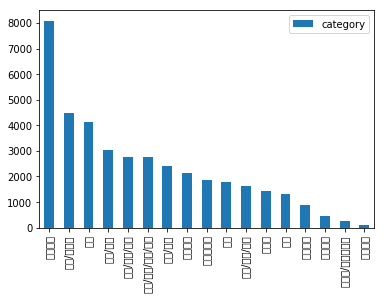

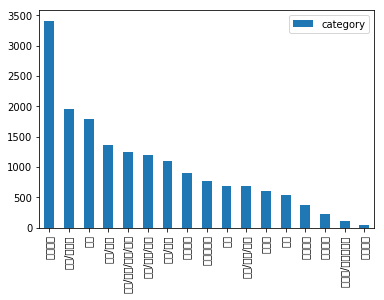

In [180]:
df_train_category_value.plot(kind='bar')
df_test_category_value.plot(kind='bar')

# 단어 벡터화 하기

! pip install soynlp

from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer
from soynlp.noun import LRNounExtractor

enizer = RegexTokenizer()
enizer

noun_extractor = LRNounExtractor(verbose=True)
df['content_preprocessing3'] = df['content_preprocessing2'].apply(noun_extractor.train)
#df['content_preprocessing3'] = df['content_preprocessing3'].apply(noun_extractor.extract())

In [ ]:
df['content_preprocessing2'].head()

In [181]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
#                              tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
#                              preprocessor = None, # 전처리 도구
#                              stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
#                              min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
#                              ngram_range=(1, 3), # BOW의 단위를 1~3개로 지정합니다.
#                              max_features = 2000 # 만들 피처의 수, 단어의 수가 된다.
#                             )
# vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [182]:
# %%time 
# train_feature_vector = vectorizer.fit_transform(df_train['content_preprocessing'])
# train_feature_vector.shape

CPU times: user 59.6 s, sys: 4.83 s, total: 1min 4s
Wall time: 1min 5s


In [183]:
# %%time 
# test_feature_vector = vectorizer.fit_transform(df_test['content_preprocessing'])
# test_feature_vector.shape

CPU times: user 25.3 s, sys: 1.19 s, total: 26.5 s
Wall time: 26.6 s


In [184]:
# vocab = vectorizer.get_feature_names()
# print(len(vocab))
# vocab[:10]

2000


['n감사합니다',
 'n같은',
 'n게다가',
 'n결국',
 'n과연',
 'n국민',
 'n국민들은',
 'n국민들의',
 'n국민들이',
 'n국민을']

In [185]:
dist = np.sum(train_feature_vector, axis=0)

pd.DataFrame(dist, columns=vocab)

,n감사합니다,n같은,n게다가,n결국,n과연,n국민,n국민들은,n국민들의,n국민들이,n국민을,...,훨씬,희망을,힘든,힘들게,힘들고,힘들어,힘듭니다,힘없는,힘을,힘이
0,670,278,390,327,457,288,254,347,346,886,...,657,445,963,652,345,302,397,308,750,533


In [186]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [187]:
%%time 
train_feature_tfidf = transformer.fit_transform(train_feature_vector)
train_feature_tfidf.shape

CPU times: user 69.8 ms, sys: 22.8 ms, total: 92.6 ms
Wall time: 58.3 ms


In [188]:
%%time 
test_feature_tfidf = transformer.fit_transform(test_feature_vector)
test_feature_tfidf.shape

CPU times: user 32.5 ms, sys: 8.91 ms, total: 41.4 ms
Wall time: 22.4 ms


In [189]:
test_feature_tfidf.shape

(16968, 2000)

# 랜덤 포레스트로 학습시키기
* 공식문서 : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [190]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 400, n_jobs = -1, random_state=2018, oob_score=True, warm_start = True, max_leaf_nodes = 100)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=True, random_state=2018, verbose=0, warm_start=True)

In [191]:
# 학습에 사용할 y_label 을 넣어줍니다.
# 어떤 분야의 청원인지 예측할 것이기 때문에 category를 넣어줍니다.
y_label = df_train['category']
%time forest = forest.fit(train_feature_tfidf, y_label)

CPU times: user 1min 31s, sys: 862 ms, total: 1min 32s
Wall time: 32.7 s


# 학습이 잘 되었는지 평가하기

시험공부에 비유해 보면, (feat.애란쌤)
1. 기출문제를 모은다
2. 공부한다
3. 시험본다

여기에서 2번 단계를 하는 여러 전략이 있을텐데요, 기출문제를 모두 외워버리면 과연 내가 실제 시험을 잘 치룰 수 있을지 아니면 공부를 더 해야할지 판단하기가 애매합니다. 괜찮은 전략 중 하나는 기출문제 중 일부를 임의로 뽑아내서 공부하고(training set을 이용한 학습), 나머지 기출문제를 풀어보며 내가 얼마나 잘 푸는지 평가를 해보는겁니다(validation set을 통해 학습의 성과를 검증). 잘 된다 싶으면 시험을 볼 준비가 된 것입니다(실전 투입).


기출문제를 몽땅 외우면 기출문제 내에서는 100점을 받겠지만(overfitting), 실전에서도 그러한 성적을 가두리라 기대하기 어렵습니다.

In [192]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

scoring = 'accuracy'
%time score = cross_val_score(forest, train_feature_vector, y_label, cv=k_fold, n_jobs=-1, scoring=scoring)
score

CPU times: user 971 ms, sys: 1.09 s, total: 2.06 s
Wall time: 1min 6s


array([0.37340573, 0.3776992 , 0.37934083, 0.38191462, 0.37534731])

In [193]:
round(np.mean(score)*100,2)

37.75

# 예측

In [194]:
# 테스트 데이터를 넣고 예측합니다.
y_pred = forest.predict(test_feature_vector)
y_pred[:3]

array(['인권/성평등', '반려동물', '정치개혁'], dtype=object)

In [195]:
y_pred.shape

(16968,)

In [196]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 줍니다.
output = pd.DataFrame(data={'category_pred':y_pred})
output.head()

,category_pred
0,인권/성평등
1,반려동물
2,정치개혁
3,정치개혁
4,육아/교육


In [197]:
# 0과 1이 어떻게 집계 되었는지 확인합니다.
# 실제 데이터에는 답변 대상 건이 있는데 없는 것으로 예측되었
output['category_pred'].value_counts()

정치개혁           9557
육아/교육          2516
외교/통일/국방       1191
문화/예술/체육/언론    1020
인권/성평등          834
반려동물            644
경제민주화           342
보건복지            316
안전/환경           272
교통/건축/국토        175
일자리              93
기타                7
미래                1
Name: category_pred, dtype: int64

In [198]:
df_test['category_pred'] = y_pred

In [199]:
df_test['pred_diff'] = 0
df_test['pred_diff'] = (df_test['category'] == df_test['category_pred'] ) == 1
df_test['pred_diff'] = df_test['pred_diff'].astype(int)
df_test.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2,pred_diff
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,인권/성평등,존경하옵는 문재인대통령님께 n저는 중국원양자원이라는 KOSPI상장사의 소액 주주...,존경하옵는 문재인대통령님께 n저는 중국원양자원이라는 KOSPI상장사의 소액 주주...,0
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이...",반려동물,존경하는 대통령님께 n코스피 주식종목 중국 원양자원은 현재 계속되는 장 대표이사의 ...,존경하는 대통령님께 n코스피 주식종목 중국 원양자원은 현재 계속되는 장 대표이사의 ...,0
12,33,2017-08-19,2017-11-17,0,15,인권/성평등,납득할 수 있는 장애 재판정을 받고 싶습니다.,안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...,정치개혁,안녕하십니까 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다 합창 시절 ...,안녕하십니까 경직형 양마비 뇌병변 장애를 가진 장애 대학생 합창 시절 열심히 공부하...,0
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,정치개혁,현황 n우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...,현황 n우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...,0
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,육아/교육,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 저는 치위생과 학년 학생입니다...,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 치위생과 학년 학생입니다 다름...,0


In [200]:
# 맞게 예측한 청원은 1, 틀린 예측은 0으로 표기되었습니다.
pred_diff = df_test['pred_diff'].value_counts()
pred_diff

0    13027
1     3941
Name: pred_diff, dtype: int64

In [201]:
print('전체 {}건의 데이터 중 {}건 예측'.format(y_pred.shape[0], pred_diff[1]))

전체 16968건의 데이터 중 3941건 예측


In [202]:
acc = ( pred_diff[1] / y_pred.shape[0] )*100 
print('예측 비율 {}'.format(acc))

예측 비율 23.226072607260726


In [203]:
# 제대로 예측한 카테고리 데이터를 봅니다.
predict_correct = df_test.loc[df_test['pred_diff'] == 1]
predict_correct.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2,pred_diff
42,65,2017-08-20,2017-11-18,0,285,육아/교육,기간제교사 정규직 및 무기계약직전환 반대합니다,"저는 영어전문강사, 스포츠전문강사를 무기계약직 혹은 정규직으로 전환하는 것에 반대합...",육아/교육,저는 영어전문강사 스포츠전문강사를 무기계약직 혹은 정규직으로 전환하는 것에 반대합니...,영어전문강사 스포츠전문강사를 무기계약직 혹은 정규직으로 전환하는 것에 반대합니다 n...,1
43,66,2017-08-20,2017-09-19,0,263,육아/교육,기간제 교사 및 각종 강사들의 무기계약 및 정규직 전환 반대합니다!,"정부에서 제시한 일자리 로드맵에서 사회적 합의를 위해 청년들에게 인기가 많고, 공채...",육아/교육,정부에서 제시한 일자리 로드맵에서 사회적 합의를 위해 청년들에게 인기가 많고 공채가...,정부에서 제시한 일자리 로드맵에서 사회적 합의를 청년들에게 인기가 많고 공채가 부분...,1
48,71,2017-08-20,2017-09-19,0,4484,육아/교육,"영양 교사 폐지, 영양직 직렬 신설을 청원합니다.",대통령님께서 대선 후보이시던 시절 충격적인 기사를 접했습니다. 영양사 단체 행사에서...,육아/교육,대통령님께서 대선 후보이시던 시절 충격적인 기사를 접했습니다 영양사 단체 행사에서 ...,대통령님께서 대선 후보이시던 시절 충격적인 기사를 접했습니다 영양사 단체 행사에서 ...,1
95,119,2017-08-20,2017-08-27,0,113,육아/교육,기간제 교사의 정규직전환을 반대합니다.,나라가 교육을 결정한다? 아닙니다.\n교육이 나라의 미래이고 국가의 근본입니다.\n...,육아/교육,나라가 교육을 결정한다 아닙니다 n교육이 나라의 미래이고 국가의 근본입니다 n교육의...,나라가 교육을 결정한다 아닙니다 n교육이 나라의 미래이고 국가의 근본입니다 n교육의...,1
119,143,2017-08-20,2017-10-19,0,46,육아/교육,교사가 되기 위한 꿈!그에 대한 나의 노력이 다른 사람들의 기념주화발행으로 부서져...,대통령님께 이러한 글을 써서 전할수도 있다는 것이 좋아 잠시 눈가에 눈물대신 입가에...,육아/교육,대통령님께 이러한 글을 써서 전할수도 있다는 것이 좋아 잠시 눈가에 눈물대신 입가에...,대통령님께 이러한 글을 써서 전할수도 있다는 것이 좋아 잠시 눈가에 눈물대신 입가에...,1


In [ ]:
predict_incorrect = df_test.loc[df_test['pred_diff'] == 0].copy()
predict_incorrect.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2,pred_diff
148387,178819,2018-03-28,2018-04-27,0,3270,기타,실적압박으로 인한 자살 기억하시는지요...현재도 진행형입니다..,안녕하십니까.\nkt 통신사 고객센터에 근무하는 와이프를 둔 가장입니다\n알고계실지...,문화/예술/체육/언론,안녕하십니까 kt 통신사 고객센터에 근무하는 와이프를 둔 가장입니다 알고계실지 모...,안녕하십니까 kt 통신사 고객센터에 근무하는 와이프를 둔 가장입니다 알고계실지 모...,0
148492,178954,2018-03-28,2018-04-27,0,2030,안전/환경,김부겸 행정안전부 장관님께 정확한 사실관계 확인 부탁드립니다.,"道 기획조정실, 일방적 사업 축소 반발 일자 신규채용 관련 감사도\n소방관들 “업무...",보건복지,기획조정실 일방적 사업 축소 반발 일자 신규채용 관련 감사도 소방관들 업무영...,기획조정실 일방적 사업 축소 반발 일자 신규채용 관련 감사도 소방관들 업무영...,0
148635,179146,2018-03-29,2018-04-28,0,16216,보건복지,저희 엄마 사망의 진실을 알려주십시오,저는 며칠 전 병원에서 엄마를 잃었습니다.\n그런데 병원측의 너무나 어처구니 없는 ...,안전/환경,저는 며칠 전 병원에서 엄마를 잃었습니다 그런데 병원측의 너무나 어처구니 없는 대...,며칠 전 병원에서 엄마를 잃었습니다 그런데 병원측의 너무나 어처구니 대처로 억울하...,0
148763,179317,2018-03-29,2018-04-28,0,1018,교통/건축/국토,무책임한 집주인 및 임대사업자에 대한 대책을 마련해주세요,요즘 깡통전세 등 전세 세입자의 전재산으로 볼 수 있는 전세 보증금을 보장 받지 못...,육아/교육,요즘 깡통전세 등 전세 세입자의 전재산으로 볼 수 있는 전세 보증금을 보장 받지 못...,요즘 깡통전세 전세 세입자의 전재산으로 볼 전세 보증금을 보장 받지 못하는 사례가 ...,0
148854,179421,2018-03-29,2018-04-28,0,2052,반려동물,동물보호법 강화 부탁드립니다,"""한 나라의 위대성과 그 도덕성은 동물들을 다루는 태도로 판단할 수 있다. 나는 나...",육아/교육,한 나라의 위대성과 그 도덕성은 동물들을 다루는 태도로 판단할 수 있다 나는 나...,나라의 위대성과 도덕성은 동물들을 다루는 태도로 판단할 있다 나는 나약한 동물일...,0


In [ ]:
predict_incorrect_value = predict_incorrect['category'].value_counts()
predict_incorrect_value

인권/성평등         64
정치개혁           46
안전/환경          42
보건복지           40
기타             38
교통/건축/국토       35
문화/예술/체육/언론    31
행정             22
육아/교육          20
경제민주화          19
반려동물           18
일자리            18
외교/통일/국방       16
농산어촌            5
저출산/고령화대책       4
성장동력            3
미래              2
Name: category, dtype: int64

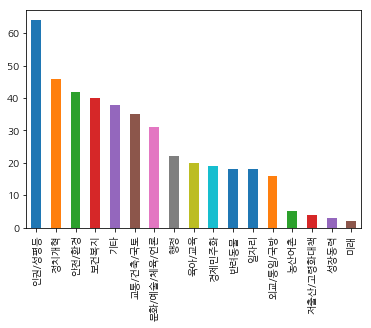

In [ ]:
# 잘못 예측한 카테고리 중 인권/성평등 카테고리가 가장 많습니다.
predict_incorrect_value.plot(kind='bar')

# 왜 예측의 정확도가 낮을까요?
* 청원을 입력하는 사람마다 카테고리 분류 기준이 정확하지 않은 것 같습니다.
* 기타로 예측한 분류도 특정 카테고리로 분류해도 될 것으로 보여집니다.

In [ ]:
predict_incorrect[['category', 'category_pred', 'title', 'content']].head(10)

,category,category_pred,title,content
148387,기타,문화/예술/체육/언론,실적압박으로 인한 자살 기억하시는지요...현재도 진행형입니다..,안녕하십니까.\nkt 통신사 고객센터에 근무하는 와이프를 둔 가장입니다\n알고계실지...
148492,안전/환경,보건복지,김부겸 행정안전부 장관님께 정확한 사실관계 확인 부탁드립니다.,"道 기획조정실, 일방적 사업 축소 반발 일자 신규채용 관련 감사도\n소방관들 “업무..."
148635,보건복지,안전/환경,저희 엄마 사망의 진실을 알려주십시오,저는 며칠 전 병원에서 엄마를 잃었습니다.\n그런데 병원측의 너무나 어처구니 없는 ...
148763,교통/건축/국토,육아/교육,무책임한 집주인 및 임대사업자에 대한 대책을 마련해주세요,요즘 깡통전세 등 전세 세입자의 전재산으로 볼 수 있는 전세 보증금을 보장 받지 못...
148854,반려동물,육아/교육,동물보호법 강화 부탁드립니다,"""한 나라의 위대성과 그 도덕성은 동물들을 다루는 태도로 판단할 수 있다. 나는 나..."
148958,안전/환경,외교/통일/국방,세월호 관련 청문회 위증한 조여옥 대위 징계바랍니다~,청문회때 실망했습니다.\n조여옥대위는 징계해야 마땅합니다.
148990,보건복지,교통/건축/국토,중국인들 건강보험 악용 막아주세요.,중국인들이 건강보험 악용하고 돌아가는 경우가 많은데 대책을 빨리 안세우고 뭐하는 ...
148999,문화/예술/체육/언론,기타,블랙하우스 폐지 반대,블랙하우스 폐지를 외치는자들에게 경종을 울리기 위해 이글을 씁니다\n고 노무현 대통...
149001,안전/환경,보건복지,"미세먼지,초미세먼지 WHO 기준으로 관리(기록,예보,보도 등) 의무화 해주세요.",포털싸이트와 공중파 포함 방송사들의\n미세먼지 기준의 예보를 WHO 미세먼지 기준으...
149190,정치개혁,보건복지,황전원 특조위원 박탈을 청원합니다,숨겨진 세월호 7시간에 대하여 조사결과가 나오고 있는 이 시점에서\n오늘 하루 또 ...


## 원래 데이터 중 기타로 분류되었으나 분류기가 다르게 예측한 청원을 봅니다.

In [ ]:
predict_incorrect_etc = predict_incorrect.loc[predict_incorrect['category'] == '기타'].copy()
predict_incorrect_etc[['category', 'category_pred', 'title', 'content']].head(10)

,category,category_pred,title,content
148387,기타,문화/예술/체육/언론,실적압박으로 인한 자살 기억하시는지요...현재도 진행형입니다..,안녕하십니까.\nkt 통신사 고객센터에 근무하는 와이프를 둔 가장입니다\n알고계실지...
149650,기타,반려동물,조여옥 이슬비 대위를 수사하여 주시기 바랍니다,아직도 청문회 장면이 생생합니다\n뻔한 거짓말로 눈하나 까딱않고 위증을 하던 증인~...
153495,기타,보건복지,부모 같지 않은 부모들이 자식 주소지 조회 못 하게 해주세요,가정 폭력 소명하지 않아도 부모 같지 않은 부모들이 자식 주소지 조회 못 하게 해주...
155041,기타,교통/건축/국토,제주도 24개월 아이 성폭행 사건 재조사를 부탁드립니다,https://www1.president.go.kr/petitions/187544?...
155272,기타,육아/교육,삼성 이재용일가와 삼성증권 처벌과 대한민국 사법부의 개혁을 요구합니다,"'승계작업' 존재는 부정... '삼성'만 웃었습니다\n김 재판장은 ""승계작업과 관련..."
155681,기타,육아/교육,"동물들이 고통받는 '체험형 실내 동물원', 규제할 방안을 마련해주세요.",요즘 ‘체험형 실내 동물원’이 유행하고 있습니다. 실내에 있기 때문에 이동이 편하고...
157353,기타,보건복지,어버이날 휴일지정 반대합니다,어버이날을 휴일로 지정하여 연휴를 늘리는 것\n반대합니다.\n경제적 부담이 크고 명...
158445,기타,인권/성평등,<<불합리한 식품위생법 개정과 청소년 음주 관용에 대한 청소년 보호법 개정을 위한 ...,<<불합리한 식품위생법 개정과 청소년 음주 관용에 대한 청소년 보호법 개정을 위한 ...
160122,기타,교통/건축/국토,대한항공 조현민 전무의 갑질을 엄중 처벌해야합니다.,대한항공 조현민의 갑질을 엄중 처벌해야합니다.\n지난번 땅콩회항 사건 당시 조현아의...
161075,기타,정치개혁,대한항공 -> 한진항공으로!!,대한은 대한민국을 의미합니다.\n처음 조현아의 땅콩회항 사건 때 실시해야 했습니다....
